# Trabalho de Implementação e Análise de Algoritmos de Implementação

### Integrantes: 
João Canavarro

Renan Cunha

Ronaldd Pinho

Wagner Felidré

In [14]:
import sys
import random
import matplotlib.pyplot as plt
import numpy as np

import time
import random

sys.path.append("algoritmos/")

In [2]:
def heapify(unsorted, index, heap_size):
    largest = index
    
    left_index = 2 * index + 1
    
    right_index = 2 * index + 2
    
    #verifies that the left is greater than the index and the element of the left is greater
    #than the highest index, if yes the maximum index receives the index of the left.
    if left_index < heap_size and unsorted[left_index] > unsorted[largest]:
        largest = left_index

    if right_index < heap_size and unsorted[right_index] > unsorted[largest]:
        largest = right_index

        
    if largest != index:
        # if there was exchange the index receives the largest and the largest receives the indece
        unsorted[largest], unsorted[index] = unsorted[index], unsorted[largest]
        # calls the function with the new index that will be the largest, will scroll to the last element
        heapify(unsorted, largest, heap_size)


def heap_sort(unsorted):
    
    n = len(unsorted)
    
    for i in range(n // 2 - 1, -1, -1): # invert vector and subtract 1 from mod, so start the from pivo
        heapify(unsorted, i, n)
        
    for i in range(n - 1, 0, -1): # inverts and reads every vector minus the first element and the last element
        
        unsorted[0], unsorted[i] = unsorted[i], unsorted[0] # exchange last element for the first
        heapify(unsorted, 0, i) # resets the first element with greater
    return unsorted

if __name__ == '__main__':
    
    try:
        raw_input          # Python 2
    except NameError:
        raw_input = input  # Python 3
        
    #unsorted = np.random.randint(100, size = 100)  #Generate 100 elements

## Questão 1

In [3]:
print('e ai')

e ai


## Questão 2

## A) Use uma sequência aleatória de números inteiros entre 1 e 100 como entrada do algoritmo e apresente o print da execução.

In [4]:
unsorted = np.random.randint(100, size = 100)  #Generate 100 elements
print(heap_sort(unsorted))

[ 0  0  2  2  3  3  5  5  6  8 11 11 12 15 15 17 18 21 21 21 23 24 26 26
 28 28 28 29 30 32 35 35 37 37 37 38 38 39 39 39 43 43 44 45 45 45 48 50
 50 53 54 55 57 57 57 59 61 61 61 61 61 61 63 63 65 65 66 66 67 69 70 71
 71 72 75 75 76 76 76 77 81 81 82 83 84 84 85 87 87 88 89 94 94 95 95 95
 97 97 99 99]


## B) Qual é a complexidade no tempo do algoritmo? Explique.

A complexidade do algoritmo é de n.log(n)

## C) Compare o tempo de execução do algoritmo quando o mesmo recebe como entrada sequências ordenadas (em ordem crescente e decrescente) e desordenadas. 
## Caso mais números fossem inseridos nas sequências, como o desempenho do algoritmo seria afetado? Usando dados reais, ilustre graficamente suas conclusões.

In [24]:
def temp_exec(size):
    
    tempo_crescente = []
    tempo_decrescente = []
    tempo_desordenado = []
    
    for i in range(0,100):
        
        if(size == 0):
            tam = 100
        else:
            tam = random.randint(200,1000)

        unsorted = np.random.randint(tam, size = tam)  #Generate 1elements
        vetor = heap_sort(unsorted)

        inicio = time.time()
        crescente = heap_sort(vetor)
        fim = time.time()
        t1 = fim - inicio
        tempo_crescente.append(t1)

        inicio = time.time()
        decrescente = heap_sort(vetor[::-1])
        fim = time.time()
        t2 = fim - inicio
        tempo_decrescente.append(t2)

        inicio = time.time()
        desordenado = heap_sort(unsorted)
        fim = time.time()
        t3 = fim - inicio
        tempo_desordenado.append(t3)
        
    return tempo_crescente, tempo_decrescente, tempo_desordenado

In [7]:
def tamanho_fixo(tempo_crescente, tempo_decrescente, tempo_desordenado):
    plt.plot(tempo_crescente, 'r')
    plt.plot(tempo_decrescente, 'g')
    plt.plot(tempo_desordenado, 'b')
    plt.legend(('Tempo Crescente', 'Tempo Decrescente', 'Tempo Desordenado'), loc = 'upper center', shadow=True)
    plt.title("Tamanho fixo de elementos")
    plt.show()

In [22]:
def tamanho_variado(tempo_crescente, tempo_decrescente, tempo_desordenado):
    plt.plot(tempo_crescente, 'r')
    plt.plot(tempo_decrescente, 'g')
    plt.plot(tempo_desordenado, 'b')
    plt.legend(('Tempo Crescente', 'Tempo Decrescente', 'Tempo Desordenado'), loc = 'upper center', shadow=True)
    plt.title("Tamanho variado de elementos")
    plt.show()

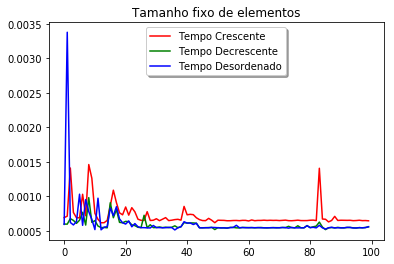

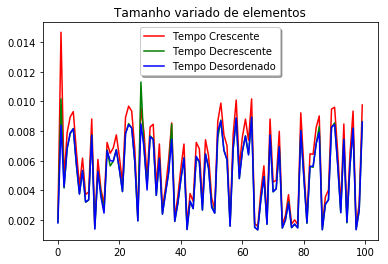

In [25]:
tempo_crescente, tempo_decrescente, tempo_desordenado = temp_exec(0)

tamanho_fixo(tempo_crescente, tempo_decrescente, tempo_desordenado)

tempo_crescente, tempo_decrescente, tempo_desordenado = temp_exec(1)
tamanho_variado(tempo_crescente, tempo_decrescente, tempo_desordenado)

## D)  Faça um estudo comparativo do algoritmo HeapSort com os algoritmos QuickSort, implementados na Questão 1, nas situações apresentadas.

## Questão 3

In [ ]:
qual foi

## Questão 4

In [ ]:
fala